In [2]:
%run ../../algorithmeX.ipynb

## [Polyiamonds](https://en.wikipedia.org/wiki/Polyiamond)

Les idées suivantes sont issues du TAOCP de D. Knuth, Vol. 4B, p. 446, ex. 124.

On pave le plan par des triangles équilatéraux de côté $1$.  
Pour tous $(i,j,k)\in \mathbf Z\times \mathbf Z\times\{1,2\}$, on définit le *triangle* $(i,j,k)$ selon le schéma suivant 

![grille](grille.png)

On place l'origine du plan au centre du triangle $(0,0,2)$.

Le triangle $(i,j,2)$ est donc le $\triangle$-triangle dont le centre est $i\times\mathbf u(0)+ j\times \mathbf u(\pi/3)$ où $\mathbf u(\theta)$ désigne le vecteur unitaire qui fait l'angle $\theta$ avec le premier vecteur de la base canonique, et $(i,j,1)$ est le $\bigtriangledown$-triangle situé immédiatement à droite de $(i,j,2)$.

Les principes sont les mêmes que pour les [polyominos](../puzzles-carres/puzzles-carres.ipynb).

Ici, il y a 6 isométries du triangle auxquelles il faut ajouter les isométries qui échangent $\triangle$ et $\bigtriangledown$.

Pour les obtenir, on procède de la manière suivante :

L'application $(i,j,k)\in \mathbf Z^2\times\{1,2\}\mapsto(i,j,k-i-j)\in\{(i',j',k')\in\mathbf Z^3\;|\;i'+j'+k'\in\{1,2\}\}$ est une bijection et on constate (exercice) que les 12 isométries  correspondent aux 6 permutations du triplet $(i',j',k')$ éventuellement composées avec $(i',j',k')\mapsto(1-i',1-j',1-k')$.

In [3]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['toolbar'] = 'None'

In [8]:
import itertools

class PIECE:

    # une piece est un ensemble (frozenset) de triplets (i,j,k), k = 1, 2
    def __init__(self,nom,piece,couleur = None):
        self.nom = nom
        self.piece = PIECE.normalise(piece)
        self.largeur = max(t[0] for t in self.piece) + 1
        self.hauteur = max(t[1] for t in self.piece) + 1
        self.couleur = couleur
      

    def __hash__(self):
        return hash(self.piece)

    def __eq__(self,q):
        return self.piece == q.piece

    def __str__(self):
        return str((self.nom,self.piece))

    def normalise(piece):
        min_i = min(t[0] for t in piece)
        min_j = min(t[1] for t in piece)
        return frozenset((i - min_i, j - min_j, k) for i, j, k in piece)

    def transposee(self):
        return PIECE(self.nom, frozenset((1 - i, 1 - j, 3 - k) for i, j, k in self.piece))

    def isometriquesMoitie(self): # != isometriquesPlus
        l = []
        for s in itertools.permutations((0,1,2)):
            def sigma(t):
                i, j, k = t
                u = (i, j, k - i - j)
                return (u[s[0]], u[s[1]], k)
            l.append(PIECE(self.nom, frozenset(sigma(t) for t in self.piece))) 
        return list(set(l))
    
    def isometriques(self):
        l1 = self.isometriquesMoitie()
        l2 = self.transposee().isometriquesMoitie()
        return(list(set(l1 + l2)))
        
    def chgeBase(i,j):
        return  i + .5 * j,  .8660254037 * j
    
    def triangle(k):
         aux = 0.288675134594813
         return ((0., -.5, .5), (2. * aux, -aux, -aux)) if k == 2 else ((1., 0., .5), (2. * aux, 2. * aux, -aux))  
    
    def plotTriangle(ax, i, j, k, **kwargs):
        x, y =  PIECE.chgeBase(i,j)
        X, Y = PIECE.triangle(k)
        ax.fill(list(map(lambda u: x + u, X)), list(map(lambda v: y + v, Y)), **kwargs)

    def polygoneOfTriplets(e):
        """e est un ensemble de triplets d'entiers (i,j,k)
        representant une piece non nécessairement normalisée.
        Renvoie une liste de deux tuples pour le dessin de la piece.
        """
        segments = set()
        for i,j,k in e:
            x, y = PIECE.chgeBase(i,j)
            X, Y = PIECE.triangle(k)
            if k == 2:
                if (i, j, 1) not in e: segments.add(((x + X[2], x + X[0]),(y + Y[2],y + Y[0])))
                if (i - 1, j, 1) not in e: segments.add(((x + X[0], x + X[1]),(y + Y[0],y + Y[1])))
                if (i, j - 1, 1) not in e: segments.add(((x + X[1], x + X[2]),(y + Y[1],y + Y[2])))
            else:
                if (i, j, 2) not in e: segments.add(((x + X[1], x + X[2]),(y + Y[1],y + Y[2])))
                if (i + 1, j, 2) not in e: segments.add(((x + X[2], x + X[0]),(y + Y[2],y + Y[0])))
                if (i, j + 1, 2) not in e: segments.add(((x + X[0], x + X[1]),(y + Y[0],y + Y[1])))
        return segments
    
    def plotPolyiamond(ax, e, couleur):
        for s in PIECE.polygoneOfTriplets(e):
            ax.plot(*s, linewidth = 1, color = 'black')
        for i, j, k in e:
            PIECE.plotTriangle(ax, i, j, k,  facecolor = couleur, edgecolor='black', linewidth=.05)
        
    def plot(self):
        
        fig = plt.figure(facecolor='w')
        fig.set_figheight(self.hauteur /2.)
        ax = fig.add_subplot(111)
        ax.axis('off')
        ax.axis('equal')
        ax.set_title(self.nom)
        c = 'white' if self.couleur is None else self.couleur
        PIECE.plotPolyiamond(ax, self.piece, c)

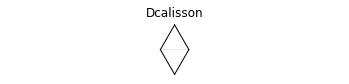

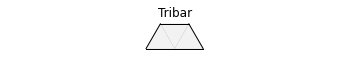

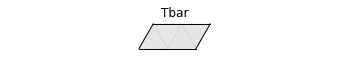

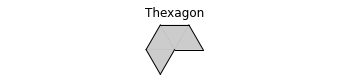

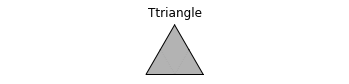

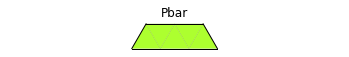

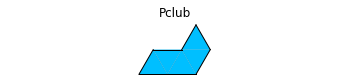

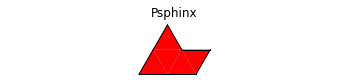

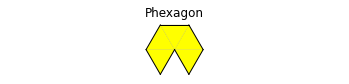

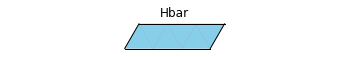

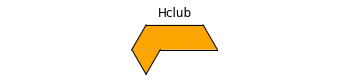

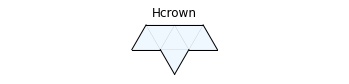

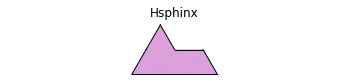

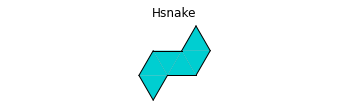

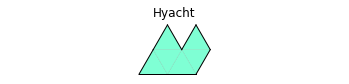

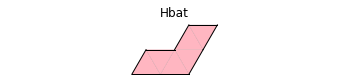

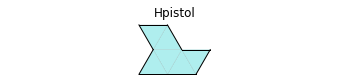

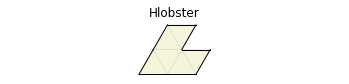

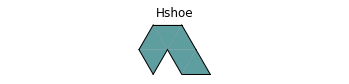

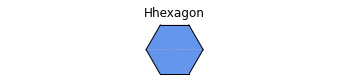

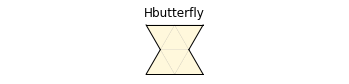

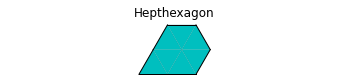

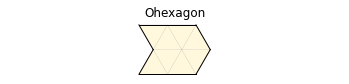

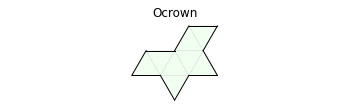

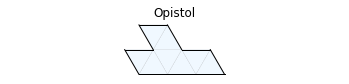

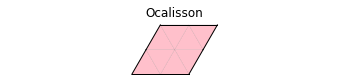

In [9]:

#------------------------------- diamond --------------------------------

Dcalisson = PIECE('Dcalisson', frozenset([(0,0,1), (0,1,2)]), couleur = 'white')

#------------------------------- triamond --------------------------------

Tribar = PIECE('Tribar', frozenset([(0,0,2),(0,0,1), (1,0,2)]), couleur = (.95,.95,.95))

#------------------------------- tetriamonds ------------------------------

Tbar = PIECE('Tbar', frozenset([(0,0,2),(0,0,1), (1,0,2), (1,0,1)]), couleur = (.9,.9,.9))
Thexagon = PIECE('Thexagon', frozenset([(0,0,2),(0,0,1), (1,0,2), (0,-1,1)]), couleur = (.8,.8,.8))
Ttriangle = PIECE('Ttriangle', frozenset([(0,0,2),(0,0,1), (1,0,2), (0,1,2)]), couleur = (.7,.7,.7))

tetriamonds = [Tbar, Thexagon, Ttriangle]

#------------------------------- pentiamonds ------------------------------

Pbar = PIECE('Pbar', frozenset([(0,0,2),(0,0,1), (1,0,2), (1,0,1), (2,0,2)]), couleur = 'greenyellow')
Pclub = PIECE('Pclub', frozenset([(0,0,2),(0,0,1), (1,0,2), (1,0,1), (1,1,2)]), couleur = 'deepskyblue')
Psphinx = PIECE('Psphinx', frozenset([(0,0,2),(0,0,1), (1,0,2), (1,0,1), (0,1,2)]), couleur = 'red')
Phexagon = PIECE('Phexagon', frozenset([(0,0,2),(0,0,1), (1,0,2), (0,-1,1), (1,-1,1)]), couleur = 'yellow')

pentiamonds = [Pbar, Pclub, Psphinx, Phexagon]

#------------------------------- hexiamonds ------------------------------

Hbar = PIECE('Hbar', frozenset([(0,0,2),(0,0,1), (1,0,2), (1,0,1), (2,0,2), (2,0,1)]), couleur = 'skyblue')
Hclub = PIECE('Hclub', frozenset([(0,0,2),(0,0,1), (1,0,2), (1,0,1), (2,0,2), (0,-1,1)]), couleur = 'orange')
Hcrown = PIECE('Hcrown', frozenset([(0,0,2),(0,0,1), (1,0,2), (1,0,1), (2,0,2), (1,-1,1)]), couleur = 'aliceblue')
Hsphinx = PIECE('Hsphinx', frozenset([(0,0,2),(0,0,1), (1,0,2), (1,0,1), (2,0,2), (0,1,2)]), couleur = 'plum')
Hsnake = PIECE('Hsnake', frozenset([(0,-1,1), (0,0,2),(0,0,1), (1,0,2), (1,0,1), (1,1,2)]), couleur = 'darkturquoise')
Hyacht = PIECE('Hyacht', frozenset([(0,0,2),(0,0,1), (1,0,2), (1,0,1), (0,1,2), (1,1,2)]), couleur = 'aquamarine')
Hbat = PIECE('Hbat', frozenset([(0,0,2),(0,0,1), (1,0,2), (1,0,1), (1,1,2), (1,1,1)]), couleur = 'lightpink')
Hpistol = PIECE('Hpistol', frozenset([(0,0,2),(0,0,1), (1,0,2), (1,0,1), (0,1,2), (-1,1,1)]), couleur = 'paleturquoise')
Hlobster = PIECE('Hlobster', frozenset([(0,0,2),(0,0,1), (1,0,2), (1,0,1), (0,1,2), (0,1,1)]), couleur = 'beige')
Hshoe = PIECE('Hshoe', frozenset([(0,0,2),(0,0,1), (1,0,2), (0,-1,1), (1,-1,1), (2,-1,2)]), couleur = 'cadetblue')
Hhexagon = PIECE('Hhexagon', frozenset([(0,0,2),(0,0,1), (1,0,2), (0,-1,1), (1,-1,1), (1,-1,2)]), couleur = 'cornflowerblue')
Hbutterfly = PIECE('Hbutterfly', frozenset([(0,-1,2), (0,-1,1), (1,-1,2), (-1,0,1), (0,0,2), (0,0,1)]), couleur = 'cornsilk')

hexiamonds = [Hbar, Hclub, Hcrown, Hsphinx, Hsnake, Hyacht, Hbat, Hpistol, Hlobster, Hshoe, Hhexagon, Hbutterfly]

#------------------------------- heptiamonds (non exhaustif) ------------------------------

Hepthexagon = PIECE('Hepthexagon', frozenset([(0,0,2),(0,0,1), (1,0,2), (0,-1,2), (0,-1,1), (1,-1,1), (1,-1,2)]), couleur = 'c')

#------------------------------- octiamonds (non exhaustif) ------------------------------

Ohexagon = PIECE('Ohexagon', frozenset([(-1,0,1), (0,0,2),(0,0,1), (1,0,2), (0,-1,2), (0,-1,1), (1,-1,1), (1,-1,2)]), couleur = 'cornsilk')
Ocrown = PIECE('Ocrown', frozenset([(0,0,2),(0,0,1), (1,0,2), (1,0,1), (2,0,2), (1,-1,1), (1,1,2), (1,1,1)]), couleur = 'honeydew')
Opistol = PIECE('Opistol', frozenset([(-1,0,1), (0,0,2),(0,0,1), (1,0,2), (1,0,1), (2,0,2), (0,1,2), (-1,1,1)]), couleur = 'aliceblue')
Ocalisson = PIECE('Ocalisson', frozenset([(0,0,2),(0,0,1), (1,0,2), (1,0,1), (0,1,2), (0,1,1), (1,1,2), (1,1,1)]), couleur = 'pink')

matplotlib.rcParams['figure.max_open_warning'] = 30

for p in [Dcalisson, Tribar] + tetriamonds + pentiamonds + hexiamonds + [Hepthexagon, Ohexagon, Ocrown, Opistol, Ocalisson]: p.plot()

In [10]:

class PUZZLE:

    def __init__(self,pieces,
                      min_i,max_i,min_j,max_j,
                      conditions = None,
                      strict = True):
        """pieces : liste de PIECE
        min_i,max_i,min_j,max_j : definition du plateau
        conditions : couple d'entiers -> booleen restreignant le plateau
    
        1er cas  : strict = True
            Pour chacun des noms des pieces, il faut placer 
            une et une seule piece portant ce nom.
            Les elements de E sont les noms des pieces
            et les cases (triplets d'entiers) du plateau.
            Chaque element de F contient un et un seul nom
            et les cases du plateau utilisees par une piece de ce nom..
        
        2eme cas : strict = False
            Pour chaque piece de pieces, on dispose,
            pour resoudre le puzzle, d'autant d'exemplaires
            que l'on veut de la piece.
            Les elements de E sont les cases du plateau.
        """
        self.min_i = min_i
        self.max_i = max_i
        self.min_j = min_j
        self.max_j = max_j
        self.strict = strict
        self.pieces = pieces
        if not conditions:
            conditions = lambda i,j: True
        lignes = dict()
        nbLignes = 0
        for p in pieces:
            for u in range(min_i, max_i - p.largeur + 2):
                for v in range(min_j, max_j - p.hauteur + 2):
                    ligne = [p.nom] if self.strict else []
                    match = True
                    for i,j,k in p.piece:
                        ic, jc = i + u, j + v
                        if conditions(ic,jc,k):
                            ligne.append((ic,jc,k))
                        else:
                            match = False
                            break
                    if match:
                        lignes[nbLignes] = ligne
                        nbLignes += 1
        self.lignes = lignes
        
    def solve(self):
        
        F = self.lignes
        return AlgorithmeX(F).solve()

    def printSolution(self,sol):     
        for l in sol: print(self.lignes[l])

    def plotSolution(self,sol):
                
        if not self.strict: 
            from random import random
            def r():
                return .6 + .4 * random()
        fig = plt.figure(facecolor='w')
        ax = fig.add_subplot(111)
        ax.axis('off')
        ax.axis('equal')
        for l in sol:
            e = set()
            for c in self.lignes[l]:
                if type(c) == tuple:
                    e.add(c)
                else:
                    couleur = eval(c).couleur 
            if not self.strict: couleur = (r(),r(),r())
            PIECE.plotPolyiamond(ax, e, couleur)

### Exemple

['Hhexagon', (-3, 1, 1), (-3, 2, 2), (-4, 2, 2), (-3, 1, 2), (-4, 1, 1), (-4, 2, 1)]
['Hpistol', (1, 1, 1), (2, -1, 1), (2, 0, 2), (1, 0, 2), (1, 1, 2), (1, 0, 1)]
['Hbar', (-2, 3, 2), (-3, 3, 1), (-2, 3, 1), (-4, 3, 2), (-3, 3, 2), (-4, 3, 1)]
['Hlobster', (0, -2, 2), (-1, -2, 1), (-1, -1, 2), (0, -1, 2), (-1, -1, 1), (-2, -1, 1)]
['Hshoe', (2, -4, 2), (1, -4, 1), (1, -3, 2), (2, -4, 1), (2, -3, 2), (0, -3, 1)]
['Hsnake', (1, -1, 2), (2, -2, 1), (2, -1, 2), (0, 0, 2), (1, -1, 1), (0, -1, 1)]
['Hbutterfly', (1, 2, 2), (0, 2, 1), (0, 3, 2), (0, 2, 2), (0, 3, 1), (-1, 3, 1)]
['Hclub', (-1, 2, 2), (-2, 2, 1), (-1, 2, 1), (-1, 3, 2), (-2, 2, 2), (-3, 2, 1)]
['Hbat', (1, 2, 1), (2, 0, 1), (2, 1, 2), (2, 2, 2), (2, 1, 1), (1, 3, 2)]
['Hsphinx', (0, 1, 1), (-1, 1, 2), (0, 0, 1), (0, 1, 2), (-1, 1, 1), (-2, 1, 1)]
['Hyacht', (1, -3, 1), (1, -2, 2), (2, -3, 1), (2, -2, 2), (1, -2, 1), (0, -2, 1)]
['Hcrown', (-1, 0, 2), (-2, 0, 1), (-2, 1, 2), (-1, 0, 1), (-2, 0, 2), (-3, 0, 1)]


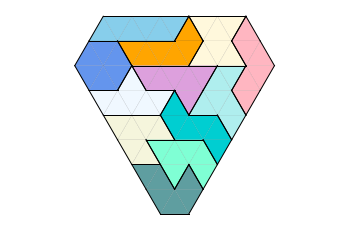

In [11]:
P = []
for p in hexiamonds: P += p.isometriques()

puzzle = PUZZLE(P,-4,2,-4,3, conditions = (lambda i,j,k: -4 <= i + j - k <= 2))
    
s = puzzle.solve()
sol = next(s)
puzzle.printSolution(sol)
puzzle.plotSolution(sol)